# Cleaning Data in Python

## Chapter 3 - Advanced Data Problems

### Uniformity

Unit uniformity can be advanced data problem. Temperatures can be in celcius or farenheit, weight can be measured in kilograms or pounds, dates can a variety of formats or numbers and text and order and money can be in a variety of currencies. Looking at the example below, it is clear that the temperatures are in celcius, except for the recording for the 7th of March, which is in farenheit. It would make sense to confirm the values visually using a scatter plot. 

       Date  Temperature
0  03.03.19          2.1
1  04.03.19          3.2
2  05.03.19          4.8
3  06.03.19          5.1
4  07.03.19         45.2


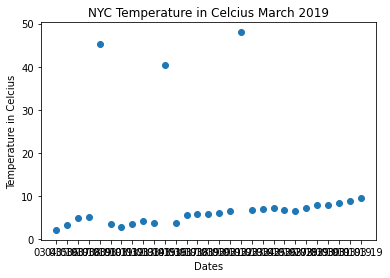

In [80]:
import os
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
os.chdir('c:\\datacamp\\data\\')

temperatures = pd.read_csv('temperature.csv')
print(temperatures.head())

plt.scatter(x='Date', y='Temperature', data = temperatures)
plt.title('NYC Temperature in Celcius March 2019')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celcius')
plt.show()

#### Treating the Temperature Data

Converting from farenheit to celcius is done using this formula: c = (F-32)x 5/9. By finding assigning a slice of the data that has temperature over 40 to temporary DataFrame, the conversion of those temperatures can be done and then reapplied to the original Farenheit data. An assert statement can be used to confirm that there are no more temperatures over 40 degrees. 

In [11]:
temp_fah = temperatures.loc[temperatures['Temperature']>40, 'Temperature']
temp_cel = (temp_fah - 32) * (5/9)
temperatures.loc[temperatures['Temperature']>40, 'Temperature'] = temp_cel

assert temperatures['Temperature'].max() < 40

#### Treating Date Data

Looking at the birthday data below, it is obviously a collection of data from various sources, with the first entry not even having an actual calendar date and the next two entered in differing formats. Using the Pandas .to_datetime() function won't work and will result in a ValueError since one of the entries has a number greater than 12 for the data and some of entries have text rather than integers. Setting the keyword argument infer_datetime_format= to True and setting the errors = keyword argument to coerce will return NA values for rows where the conversion fails. 

In [12]:
birthdays = pd.read_csv('birthdays.csv')
birthdays.head()

,Birthday,FirstName,LastName
0,27/27/19,Rowan,Nunez
1,3/29/2019,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,06-03-19,Griffith,Neal


In [13]:
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])

ParserError: month must be in 1..12: 27/27/19

In [14]:
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'], infer_datetime_format = True, errors = 'coerce')

In [15]:
birthdays.head()

,Birthday,FirstName,LastName
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


The dates can also be converted using the .dt.strftime() method. This method accepts a date/time format of your choice. In the example below the dates are converted from year-month-day to day-month-year.

In [16]:
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime('%d-%m-%Y')
birthdays.head()

,Birthday,FirstName,LastName
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal


#### Treating Ambiguous Date Data

A common problem are ambiguous date formats. Notice Griffth Neal, that date June 3, 2019 or March 6, 2019? Unfortunately these are often indistinguishable unless there is surrounding data that allows for the date format to be inferred or the dates can be convereted to NAs. In this case, in the original data, both Deacon Prince and Griffith Neal had all numerics in the birthday field and Deacon was set to day-month-year, since the first number is 24 in his entry, so possibly we can assume that Griffith was the same format, particularly if we are sure that both of these entries can from the same original source.

### Exercise 1

#### Uniform currencies
In this exercise and throughout this chapter, you will be working with a retail banking dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts, their currency, amount invested, account opening date and last transaction date that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The pandas package has been imported as pd, and the banking DataFrame is in your environment.

__Instructions:__
* Find the rows of acct_cur in banking that are equal to 'euro' and store them in acct_eu.
* Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
* Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [34]:
# create DataFrame used for this exercise
banking = pd.read_csv('bankingeuro.csv')

# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[:, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Print unique values of acct_cur
assert banking['acct_cur'].unique() == 'dollar'

#### Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The account_opened column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The banking DataFrame is in your environment and pandas was imported as pd.

__Instructions:__
* Print the header of account_opened from the banking DataFrame and take a look at the different results.
* Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
* Extract the year from the amended account_opened column and assign it to the acct_year column.
* Print the newly created acct_year column.

In [20]:
# Print the header of account_opened
print(banking['account_opened'].head())

0    03/05/18
1    21-01-18
2    26-01-18
3    21-08-17
4    05/06/17
Name: account_opened, dtype: object


In [21]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
# Infer datetime format
infer_datetime_format = True,
# Return missing value for error
errors = 'coerce') 

In [22]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    2018
1    2018
2    2018
3    2017
4    2017
Name: acct_year, dtype: object


### Cross Field Validation

When data has been collected from different data sources, it is important to verify that the data is correct. One way to do this is using cross field validation: using multiple fields in a dataset to check the data integrity. Looking at the data below for passenger counts on individual flights, it should be that the sum of the different class types should equal the total_passengers number. This is accomplished using the Pandas .sum() function, across axis = 1, the rows of the different class types and comparing that sum to the total_passengers entry. Then the results of the comparison between the class sum and the total passenger count is used to filter out which rows are consistent and which are not.

In [28]:
flights = pd.read_csv('flights.csv')
print(flights.head())

sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis=1)
passenger_equ = sum_classes == flights['total_passengers']

inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

  flight_number  economy_class  business_class  first_class  total_passengers
0         DL140            100              60           40               200
1         BA248            130             100           70               300
2        MEA124            100              50           50               200
3        AFR939            140              70           90               300
4        TKA101            130             100           20               250


Looking at the users data below, the age column can be verified by subtracting today's date from the date in the Birthday column and comparing it to the value in the Age column. It is best practice to ensure the birthday field is a date/time field by setting it with the Pandas' .to_datetime() method. From there, a today variable is created using .date.today() function from the datetime library and subtract the year of the variable today from the year of the user's birthday. 

As in the example above, the manual age calculation is compared to the Age value and consistent and inconsistent rows are filtered with the comparison. 

In [33]:
users = pd.read_csv('users.csv')
print(users.head())

users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()

age_manual = today.year - users['Birthday'].dt.year

age_equ = age_manual == users['Age']

inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

   user_id  Age    Birthday
0    32786   22  1998-03-02
1    94387   27  1993-12-04
2    34236   42  1978-11-24
3    12551   31  1989-01-03
4    55212   18  2002-07-02


### Exercise 2

#### How's our data integrity?
New data has been merged into the banking DataFrame that contains details on how investments in the inv_amount column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of inv_amount and age against the amount invested in different funds and customers' birthdays. Both pandas and datetime have been imported as pd and dt respectively.

__Instructions:__
* Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
* Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.
* Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
* Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [39]:
#Create DataFrame used for this exercise
banking = pd.read_csv('banking_dirty.csv')
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [44]:
# Store today's date and find ages
today = dt.date.today()
banking['birth_date'] = pd.to_datetime(banking['birth_date'])
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  8


### Completeness

Missing data is the most common data problem, this is when data value is stored for a variable in an observation. Finding rows with missing values can be done using the .isna() method, returning a boolean list. Chaining the .sum() method to the .isna() will provide a count of the total number of missing values for each variable. We notice, in the missing.describe(), the mean, min and max are all extremely low temperatures which may be correlated to the lack of a CO2 measurement. This can be verified once again with a visualization of the airquality data, sorted by Temperature. The sorted visualization shows all the missing CO2 values at the top, where the temperatures are the smallest. |

In [69]:
airquality = pd.read_csv('airquality.csv')
print(airquality)
print(airquality.isna())
airquality.isna().sum()

        ID        Date  Temperature   CO2
0      253   9/25/2007          -22  0.01
1      256   11/7/2004           15  0.43
2      280  12/31/2005           -9  0.77
3      285  12/23/2004           -3  0.47
4      292    3/5/2009           28  0.49
...    ...         ...          ...   ...
1239  9946   5/26/2008          -23   NaN
1240  9956   11/3/2008           26  0.01
1241  9971   11/8/2007           31  0.16
1242  9988   8/13/2008           36  0.82
1243  9998   11/9/2008          -21  0.56

[1244 rows x 4 columns]
         ID   Date  Temperature    CO2
0     False  False        False  False
1     False  False        False  False
2     False  False        False  False
3     False  False        False  False
4     False  False        False  False
...     ...    ...          ...    ...
1239  False  False        False   True
1240  False  False        False  False
1241  False  False        False  False
1242  False  False        False  False
1243  False  False        False  False

[1

ID              0
Date            0
Temperature     0
CO2            19
dtype: int64

#### Missingno

Missingno is a Python package allows the creation of visualizations of missing data. Using the .matrix function of the missingno library, we see the missing data is only in the CO2 and appears to be randomly scattered throughout the column, but let's confirm that by creating two slices the airquality DataFrame, one where the CO2 value is missing and one where it is not and then check the summary statistics of these DataFrame slices using the .describe() method.

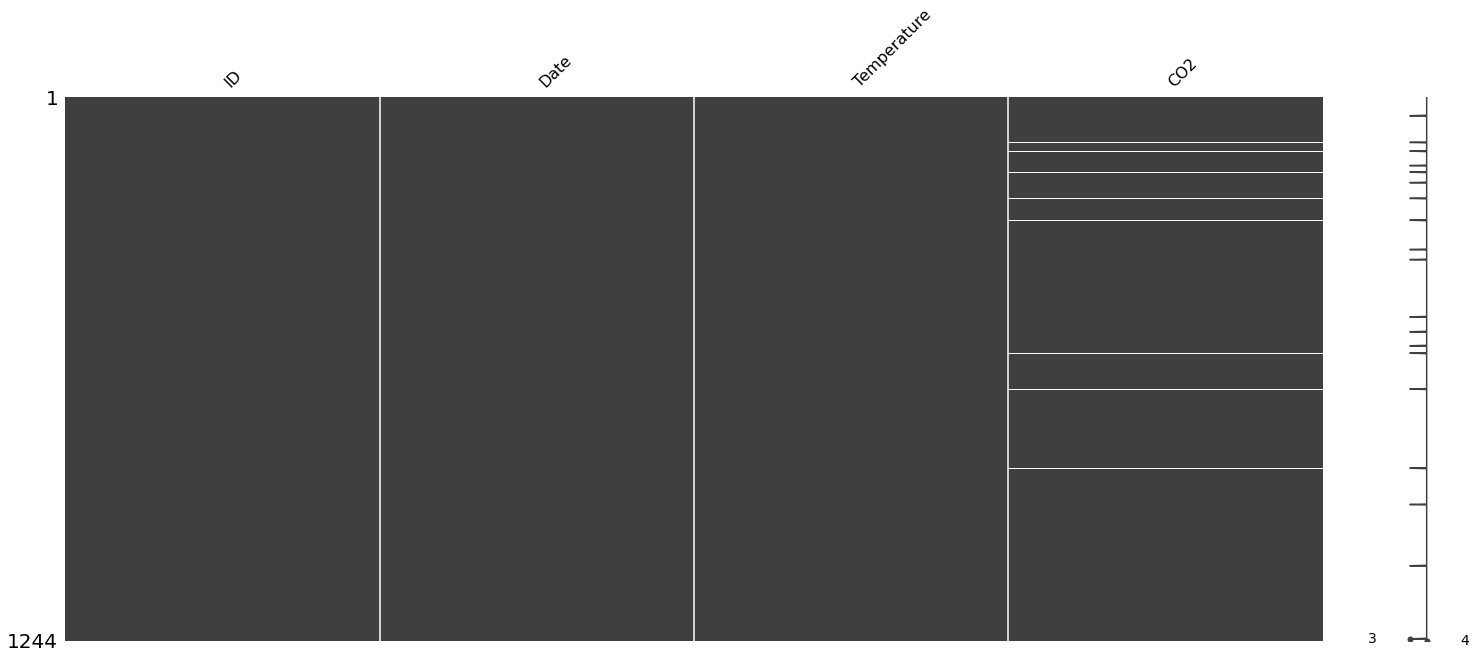

In [70]:
import missingno as msno
from matplotlib import pyplot as plt

msno.matrix(airquality)
plt.show()

In [71]:
missing = airquality[airquality['CO2'].isna()]
complete = airquality[~airquality['CO2'].isna()]

print(missing.describe())
print(complete.describe())

                ID  Temperature  CO2
count    19.000000    19.000000  0.0
mean   4095.789474   -29.473684  NaN
std    2655.287944    13.566169  NaN
min     669.000000   -49.000000  NaN
25%    1952.000000   -38.000000  NaN
50%    3326.000000   -32.000000  NaN
75%    5193.000000   -23.000000  NaN
max    9946.000000    -2.000000  NaN
                ID  Temperature          CO2
count  1225.000000  1225.000000  1225.000000
mean   5255.750204     5.853061     0.509118
std    2768.531049    18.328465     0.290392
min     253.000000   -27.000000     0.010000
25%    2910.000000    -9.000000     0.260000
50%    5211.000000     5.000000     0.510000
75%    7676.000000    20.000000     0.760000
max    9998.000000    54.000000     1.400000


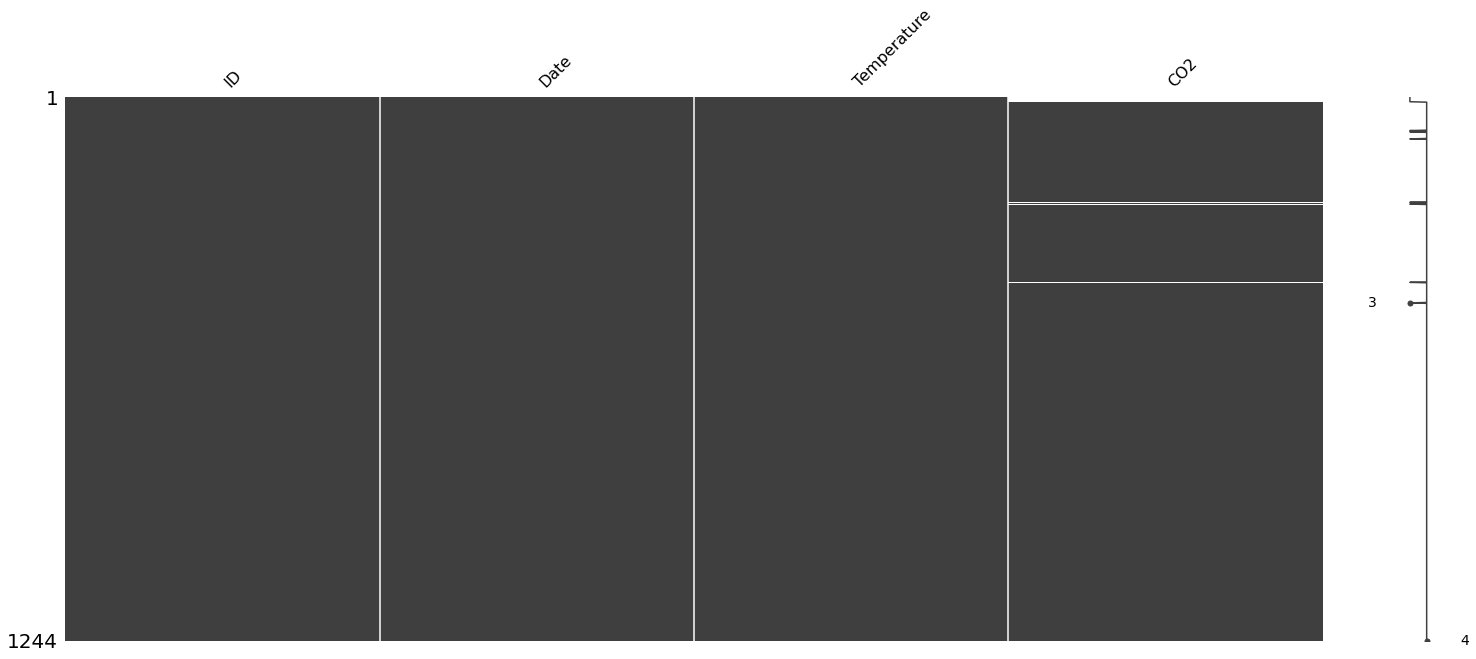

In [72]:
sorted_airquality = airquality.sort_values(by='Temperature')
msno.matrix(sorted_airquality)
plt.show()

#### Missingness Types

There are 3 basic missingness types:
* Missing Completely At Random (MCAR) - There is no systematic relationship between missing data and other values, often due to data input errors.
* Missing at Random (MAR) - There is a systematic relationship between missing data and other observed values, such as the CO2 data being missing at extremely low temperatures.
* Missing Not at Random (MNAR) - There is a sytematic relationship between missing data and unobserved values. This example is extremely difficult to actual determine since the relationship is with unobserved values. 

#### How to Deal With Missing Data

Simple:
> Drop missing data<br>
> Impute with statistical measures(mean, median, mode....)<br>

More Complex:
> Impute with an algorithmic approach<br>
> Impute with machine learning<br>

##### Dropping Missing Values

Using the subset keyword argument for the .dropna() method is a way to subset the data by specifying which column(s) provided in as a list, to drop when there is a missing value. 

In [73]:
airquality_dropped = airquality.dropna(subset=['CO2'])
airquality_dropped.head()

,ID,Date,Temperature,CO2
0,253,9/25/2007,-22,0.01
1,256,11/7/2004,15,0.43
2,280,12/31/2005,-9,0.77
3,285,12/23/2004,-3,0.47
4,292,3/5/2009,28,0.49


##### Replacing Missing Values with Statistical Measures

By creating a variable of the CO2 mean value, the DataSet can use the .fillna() method and provide the method with dictionary of columnname:value to fill NA values.

In [75]:
co2mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2':co2mean})
airquality_imputed.head()

,ID,Date,Temperature,CO2
0,253,9/25/2007,-22,0.01
1,256,11/7/2004,15,0.43
2,280,12/31/2005,-9,0.77
3,285,12/23/2004,-3,0.47
4,292,3/5/2009,28,0.49


### Exercise 3

#### Missing investors
Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the banking DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing inv_amount values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The pandas, missingno and matplotlib.pyplot packages have been imported as pd, msno and plt respectively. The banking DataFrame is in your environment.

__Instructions:__
* Print the number of missing values by column in the banking DataFrame.
* Plot and show the missingness matrix of banking with the msno.matrix() function.
* Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.
* Sort the banking DataFrame by the age column and plot the missingness matrix of banking_sorted.

cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64


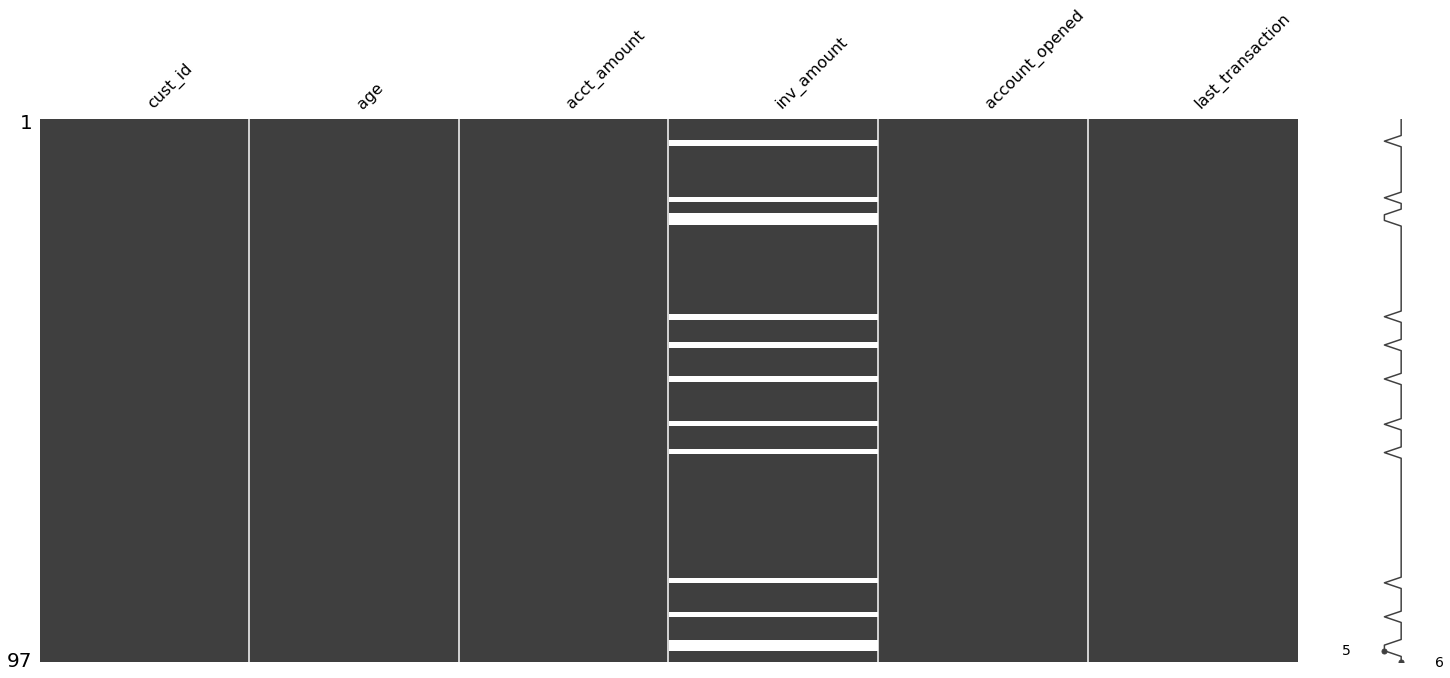

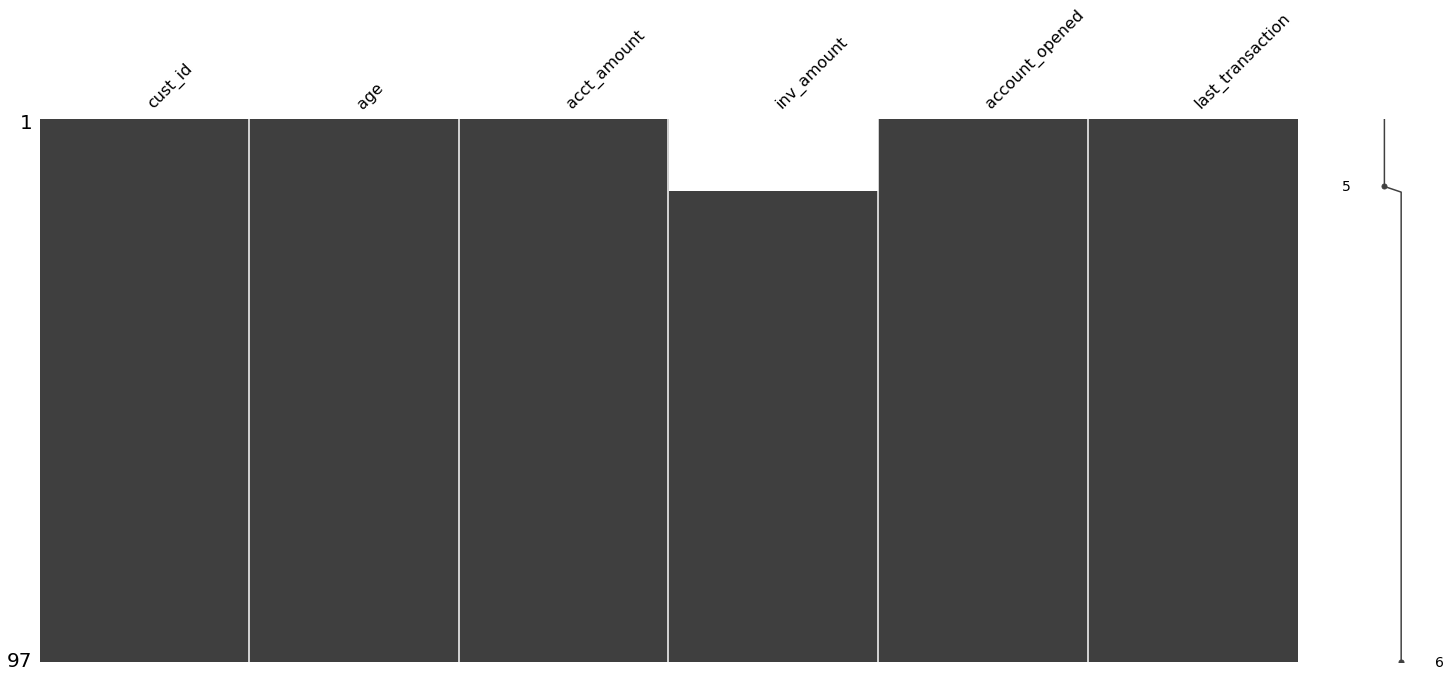

In [92]:
#Load data for this exercise
banking = pd.read_csv('bankinginvest.csv')
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by='age')
msno.matrix(banking_sorted)
plt.show()

#### Follow the money
In this exercise, you're working with another version of the banking DataFrame that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing cust_id don't really help you, and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute missing values of acct_amount with some domain knowledge.

__Instructions:__
* Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
* Compute the estimated acct_amount of banking_fullid knowing that acct_amount is usually inv_amount * 5 and assign the results to acct_imp.
* Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [95]:
#Load Data for this exercise
banking = pd.read_csv('bankingnas.csv')

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['acct_amount']/5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'inv_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
age                 0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64
